In [82]:
# code id varmaan turha (?) + mitenköhän tuo code_snippets variable hyödynnetään?
# olisko mahdollista tehdä malli, jossa syötettäisiin itse koodinpätkiä ja malli predictaisi onko human vai ai?
# logistista regressiota olisi mahdollista käyttää kyseiseen toteutukseen. Samalla voitaisiin analysoida (coefficients) ja tutkia mitkä ovat tärkeitä variableja siinä että onko koodi ai vai human"""

"from sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\nimport pandas as pd\nfrom sklearn.feature_extraction.text import TfidfVectorizer\n\ndf = pd.read_csv('../data/ai_vs_human_code_dataset.csv')\n# code id varmaan turha (?) + mitenköhän tuo code_snippets variable hyödynnetään?\n# olisko mahdollista tehdä malli, jossa syötettäisiin itse koodinpätkiä ja malli predictaisi onko human vai ai?\n# logistista regressiota olisi mahdollista käyttää kyseiseen toteutukseen. Samalla voitaisiin analysoida (coefficients) ja tutkia mitkä ovat tärkeitä variableja siinä että onko koodi ai vai human"

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset from data directory
df = pd.read_csv('../data/ai_vs_human_code_dataset.csv')

# Create X and y dataframes from whole dataset
y = df['ai_generated']
X = df.drop(columns=['code_id', 'code_snippet', 'ai_generated'])

# Split data to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

# Scale both train and test datasets
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scaled.head(5)

,code_length,num_functions,num_classes,num_variables,num_comments,comment_density,num_imports,use_of_recursion,use_of_lambda,num_loops,complexity_score,execution_time
0,-0.357497,0.671026,0.0,1.529633,0.0,0.0,-0.819741,-0.315399,-0.33685,1.003817,0.620771,0.306591
1,0.874700,0.671026,0.0,-1.099033,0.0,0.0,1.219898,-0.315399,-0.33685,1.003817,0.620771,-0.302827
2,0.800022,0.671026,0.0,1.529633,0.0,0.0,-0.819741,-0.315399,-0.33685,1.003817,0.620771,0.273350
3,-0.544194,0.671026,0.0,-1.099033,0.0,0.0,-0.819741,-0.315399,-0.33685,-0.996198,-0.362350,-0.140316
4,-0.544194,0.671026,0.0,-1.099033,0.0,0.0,-0.819741,-0.315399,-0.33685,-0.996198,-0.362350,-0.860537


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Model fitting
model = LogisticRegression(solver='lbfgs', C=0.01)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

# Fit the model
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_test_prediction = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_prediction)

print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Accuracy: %0.2f" % cv_scores.mean())
print("Test Set Accuracy: %0.2f\n" % accuracy)
print("Coefficients: ",model.coef_)
print("\nIntercept: ", model.intercept_)

Cross-Validation Scores:  [0.9047619  0.90952381 0.94285714 0.88571429 0.8952381 ]
Mean CV Accuracy: 0.91
Test Set Accuracy: 0.90

Coefficients:  [[-1.01263844 -0.1805689   0.          0.15576452  0.          0.
   0.22407693  0.47444439  0.42614826  0.27764059  0.32194573  0.08783743]]

Intercept:  [-0.04413052]


Accuracy: 0.90
Confusion Matrix:
 [[212   0]
 [ 46 192]]


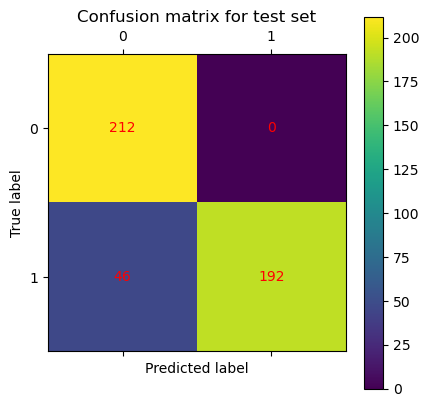

Accuracy: 0.90
Confusion Matrix:
 [[538   0]
 [100 412]]


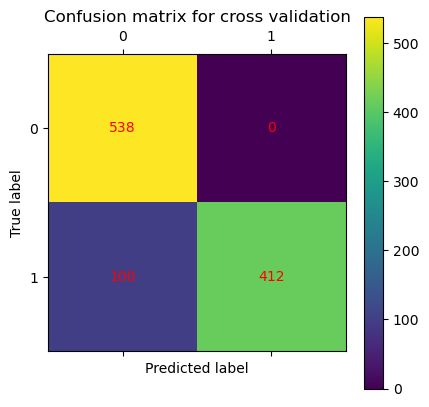

In [85]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict

# Predict on test set
y_test_prediction = model.predict(X_test_scaled)

# Initialize confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)

# Accuracy score for y_test
accuracy = accuracy_score(y_test, y_test_prediction)
print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix for test dataset
plt.matshow(cm)
plt.title('Confusion matrix for test set')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Cross Validation
y_prediction = cross_val_predict(estimator=model, X=X_train_scaled, y=y_train, cv=10)

# Initialize confusion matrix
cm = confusion_matrix(y_train, y_prediction)

# Accuracy score for y
accuracy = accuracy_score(y_train, y_prediction)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# Visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix for cross validation')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# Include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

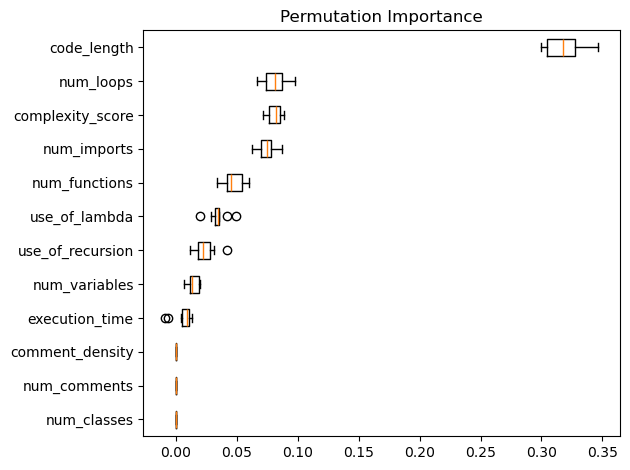

In [86]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test_scaled, y_test, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

In [87]:
# Snippet runner

import re
import time

def ensure_newline_after_functions(code_snippet):
    # Pattern to match function definitions without a newline after them
    pattern = r'(\bdef\s+\w+\s*\(.*\):)([^\n])'

    # Add a newline after function definitions if not present
    modified_code = re.sub(pattern, r'\1\n\2', code_snippet)

    return modified_code

j = 0

for i in range(len(df['code_snippet'])):
    j += 1
    sample = df['code_snippet'][i]
    function_pattern = r'def\s+(\w+)\s*\((\w+)\):'
    match = re.search(function_pattern, sample)

    if match:
        function_name = match.group(1)
        parameter_name = match.group(2)

        # Replace parameter n with 10
        modified_code = re.sub(r'\b' + parameter_name + r'\b', '10', sample)

        # Add function call to the end of the code snippet
        function_call = f'\nresult = {function_name}(300)'
        sample += function_call
        sample = ensure_newline_after_functions(sample)
        start_time = time.perf_counter_ns()
        exec (sample)
        end_time = time.perf_counter_ns()
    else:
        exec(sample)



7
7
7
7
2.0
7
2.0
7
7
2.0
2.0
2.0
2.0
7
2.0
7
2.0
2.0
2.0
7
2.0
7
2.0
7
2.0
7
7
2.0
2.0
7
7
7
7
2.0
2.0
7
7
2.0
2.0
2.0
7
2.0
2.0
2.0
7
7
7
7
2.0
7
7
7
7
7
7
7
2.0
2.0
2.0
2.0
7
2.0
7
2.0
7
2.0
2.0
7
2.0
7
7
2.0
2.0
2.0
2.0
2.0
7
2.0
2.0
7
2.0
2.0
7
7
2.0
2.0
2.0
2.0
2.0
2.0
7
7
2.0
2.0
2.0
7
7
7
7
2.0
7
2.0
2.0
2.0
2.0
7
2.0
7
7
7
7
7
2.0
7
7
7
2.0
7
2.0
2.0
7
7
2.0
7
2.0
2.0
2.0
2.0
2.0
2.0
7
2.0
2.0
2.0
7
2.0
7
7
7
2.0
7
2.0
7
2.0
2.0
7
7
2.0
7
2.0
7
2.0
2.0
7
7
2.0
7
2.0
7
7
7
2.0
7
2.0
2.0
2.0
7
7
2.0
2.0
2.0
7
7
7
2.0
7
2.0
2.0
7
7
2.0
7
7
7
2.0
7
2.0
7
7
2.0
7
2.0
7
7
7
7
7
2.0
2.0
2.0
2.0
7
7
7
7
2.0
7
7
7
2.0
2.0
7
2.0
2.0
7
2.0
7
2.0
7
7
7
7
7
7
2.0
7
7
2.0
2.0
2.0
7
7
2.0
2.0
7
7
7
2.0
7
7
2.0
2.0
2.0
2.0
7
2.0
2.0
2.0
2.0
2.0
7
7
7
2.0
2.0
2.0
2.0
2.0
2.0
7
7
2.0
2.0
2.0
7
2.0
7
7
7
7
2.0
7
7
7
7
7
7
2.0
7
7
2.0
7
7
2.0
2.0
2.0
2.0
7
7
7
2.0
7
2.0
2.0
2.0
7
2.0
7
7
2.0
7
7
2.0
7
7
2.0
7
2.0
7
2.0
2.0
7
7
7
20
7
7
20
20
20
20
7
20
20
20
7
20
20
20
7
20
20
20
20
20
7
20
7
20
